In [6]:
import eumdac
import geopandas as gpd
from datetime import datetime, timedelta
import os
import shutil
from shapely.geometry import Polygon, mapping


In [7]:
import numpy as np
from configparser import ConfigParser
from mpop import CONFIG_PATH
import os

from netCDF4 import Dataset

In [8]:
# Insert your personal key and secret into the single quotes
consumer_key = 'Vd6k2McQmh2q0QbjROMYmJwZsz0a'
consumer_secret = 'Xn7zRFi5Lws8EpGkmbvnzAT8tmMa'

credentials = (consumer_key, consumer_secret)

token = eumdac.AccessToken(credentials)

print(f"This token '{token}' expires {token.expiration}")

This token 'cfa13374-ef18-3968-80e6-e073c9d8f095' expires 2022-09-02 16:29:20.478161


In [12]:
datastore = eumdac.DataStore(token)
selected_collection = datastore.get_collection('EO:EUM:DAT:METOP:SOMO25')


In [13]:
from IPython.core.display import HTML 
# Display the details for the selected collection
display(HTML('<b>'+selected_collection.title+'</b>'))
display(HTML('<b>ID:</b> '+str(selected_collection)))
display(HTML('<b>Abstract:</b> '+selected_collection.abstract))

In [14]:
collectionID ='EO:EUM:DAT:MSG:HRSEVIRI'

datastore = eumdac.DataStore(token)
datastore.collections

selected_collection = datastore.get_collection(collectionID)
bbox =[32.9, 3.2, 48, 15]
#products = selected_collection.search(bbox=bbox) 

In [31]:
# Add vertices for polygon, wrapping back to the start point.
geometry = [[15,32.8],[2.9,32.8],[2.9,48],[48,15], [15,32.8]]

download_dir = r'C:\Users\Riccardo\Desktop\PhD docs\Drought prediction\dataset\EUMETSAT\MSG'

start_date = '2009-01-01 11:45:00'
end_date= '2020-01-01 12:20:00'

start_dt = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_dt = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
delta = timedelta(days=1)
time_window = timedelta(minutes=30)

while start_dt <= end_dt:  
    limit_dt = start_dt + time_window
    # Retrieve datasets that match our filter
    product = selected_collection.search(
        geo='POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in geometry])),
        #bbox=bbox,
        dtstart=start_dt, 
        dtend=limit_dt).first()
        
    selected_product = datastore.get_product(product_id=str(product), collection_id=collectionID)
    
    try:
        with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
            #print(f'Downloading {fsrc.name}')
            shutil.copyfileobj(fsrc, fdst)
            print(f'Download of product {fsrc.name} finished.')
        
    except Exception as e:
        print('http error {} on day'.format(e), datetime.strftime(start_dt, format='%Y-%m-%d %H:%M:%S'))
    
    start_dt += delta


Download of product MSG2-SEVI-MSG15-0100-NA-20090101121241.749000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090102121241.273000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090103121240.804000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090104121241.537000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090105121241.073000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090106121241.826000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090107121241.384000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090108121240.961000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090109121241.755000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090110121241.376000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090111121240.437000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

Download of product MSG2-SEVI-MSG15-0100-NA-20090404121240.542000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090405121241.182000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090406121241.419000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090407121241.221000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090408121241.633000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090409121241.546000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090410121240.769000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090411121241.387000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090412121240.838000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090413121241.390000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090414121241.538000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

Download of product MSG2-SEVI-MSG15-0100-NA-20090708121241.575000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090709121241.867000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090710121240.412000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090711121241.161000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090712121240.936000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090713121241.353000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090714121240.983000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090715121241.408000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090716121241.862000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090717121241.110000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20090718121241.218000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

http error 404 Client Error:  for url: https://api.eumetsat.int/data/download/collections/EO%3AEUM%3ADAT%3AMSG%3AHRSEVIRI/products/None on day 2009-10-11 11:45:00
Download of product MSG2-SEVI-MSG15-0100-NA-20091012121240.979000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091013121241.690000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091014121241.331000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091015121241.101000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091016121241.555000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091017121241.325000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091018121241.208000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091019121241.778000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20091020121241.731000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-2009102112

Download of product MSG2-SEVI-MSG15-0100-NA-20100113121241.801000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100114121240.915000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100115121241.739000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100116121242.564000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100117121242.203000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100118121241.804000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100119121242.370000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100120121242.321000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100121121242.703000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100122121241.474000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100123121242.042000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

Download of product MSG2-SEVI-MSG15-0100-NA-20100418121241.169000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100419121241.393000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100420121242.516000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100421121241.542000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100422121241.186000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100423121242.591000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100424121242.154000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100425121241.564000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100426121242.551000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100427121242.485000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100428121242.048000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

Download of product MSG2-SEVI-MSG15-0100-NA-20100722121242.141000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100723121241.971000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100724121241.234000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100725121241.747000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100726121242.031000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100727121241.373000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100728121242.104000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100729121241.596000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100730121240.848000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100731121241.482000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20100801121242.308000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

Download of product MSG2-SEVI-MSG15-0100-NA-20101025121242.522000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101026121240.954000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101027121241.053000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101028121241.211000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101029121242.682000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101030121241.472000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101031121242.034000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101101121241.662000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101102121241.730000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101103121242.425000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20101104121242.419000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

Download of product MSG2-SEVI-MSG15-0100-NA-20110128121241.666000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110129121242.467000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110130121241.652000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110131121242.165000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110201121241.593000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110202121241.139000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110203121242.606000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110204121241.770000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110205121241.644000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110206121241.650000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA-20110207121240.540000000Z-NA.zip finished.
Download of product MSG2-SEVI-MSG15-0100-NA

http error [Errno 28] No space left on device on day 2011-05-13 11:45:00
http error [Errno 28] No space left on device on day 2011-05-14 11:45:00
http error [Errno 28] No space left on device on day 2011-05-15 11:45:00
http error [Errno 28] No space left on device on day 2011-05-16 11:45:00
http error [Errno 28] No space left on device on day 2011-05-17 11:45:00
http error [Errno 28] No space left on device on day 2011-05-18 11:45:00
http error [Errno 28] No space left on device on day 2011-05-19 11:45:00
http error [Errno 28] No space left on device on day 2011-05-20 11:45:00
http error [Errno 28] No space left on device on day 2011-05-21 11:45:00
http error [Errno 28] No space left on device on day 2011-05-22 11:45:00
http error [Errno 28] No space left on device on day 2011-05-23 11:45:00
http error [Errno 28] No space left on device on day 2011-05-24 11:45:00
http error [Errno 28] No space left on device on day 2011-05-25 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2011-09-03 11:45:00
http error [Errno 28] No space left on device on day 2011-09-04 11:45:00
http error [Errno 28] No space left on device on day 2011-09-05 11:45:00
http error [Errno 28] No space left on device on day 2011-09-06 11:45:00
http error [Errno 28] No space left on device on day 2011-09-07 11:45:00
http error [Errno 28] No space left on device on day 2011-09-08 11:45:00
http error [Errno 28] No space left on device on day 2011-09-09 11:45:00
http error [Errno 28] No space left on device on day 2011-09-10 11:45:00
http error [Errno 28] No space left on device on day 2011-09-11 11:45:00
http error [Errno 28] No space left on device on day 2011-09-12 11:45:00
http error [Errno 28] No space left on device on day 2011-09-13 11:45:00
http error [Errno 28] No space left on device on day 2011-09-14 11:45:00
http error [Errno 28] No space left on device on day 2011-09-15 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20111211121241.262000000Z-NA.zip' on day 2011-12-11 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20111212121240.394000000Z-NA.zip' on day 2011-12-12 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20111213121241.265000000Z-NA.zip' on day 2011-12-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20111214121240.431000000Z-NA.zip' on day 2011-12-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120118121240.531000000Z-NA.zip' on day 2012-01-18 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120119121241.502000000Z-NA.zip' on day 2012-01-19 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120120121241.715000000Z-NA.zip' on day 2012-01-20 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120121121241.197000000Z-NA.zip' on day 2012-01-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120225121240.899000000Z-NA.zip' on day 2012-02-25 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120226121240.954000000Z-NA.zip' on day 2012-02-26 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120227121240.624000000Z-NA.zip' on day 2012-02-27 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120228115741.758000000Z-NA.zip' on day 2012-02-28 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120403121240.292000000Z-NA.zip' on day 2012-04-03 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120404121240.645000000Z-NA.zip' on day 2012-04-04 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120405121240.104000000Z-NA.zip' on day 2012-04-05 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120406121240.849000000Z-NA.zip' on day 2012-04-06 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120511121241.075000000Z-NA.zip' on day 2012-05-11 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120512121241.023000000Z-NA.zip' on day 2012-05-12 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120513121241.430000000Z-NA.zip' on day 2012-05-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120514121240.992000000Z-NA.zip' on day 2012-05-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120618121240.451000000Z-NA.zip' on day 2012-06-18 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120619121241.553000000Z-NA.zip' on day 2012-06-19 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120620121240.707000000Z-NA.zip' on day 2012-06-20 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120621121240.480000000Z-NA.zip' on day 2012-06-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120726121240.333000000Z-NA.zip' on day 2012-07-26 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120727121241.249000000Z-NA.zip' on day 2012-07-27 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120728121239.759000000Z-NA.zip' on day 2012-07-28 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120729121240.867000000Z-NA.zip' on day 2012-07-29 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120902121241.332000000Z-NA.zip' on day 2012-09-02 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120903121239.891000000Z-NA.zip' on day 2012-09-03 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120904121240.526000000Z-NA.zip' on day 2012-09-04 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20120905121240.243000000Z-NA.zip' on day 2012-09-05 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error 404 Client Error:  for url: https://api.eumetsat.int/data/download/collections/EO%3AEUM%3ADAT%3AMSG%3AHRSEVIRI/products/None on day 2012-10-10 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121011121241.194000000Z-NA.zip' on day 2012-10-11 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121012121241.407000000Z-NA.zip' on day 2012-10-12 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121013121242.254000000Z-NA.zip' on day 2012-10-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121014121241.805000000Z-NA.z

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121118121240.973000000Z-NA.zip' on day 2012-11-18 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121119121241.141000000Z-NA.zip' on day 2012-11-19 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121120121242.443000000Z-NA.zip' on day 2012-11-20 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121121121241.626000000Z-NA.zip' on day 2012-11-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121226121242.006000000Z-NA.zip' on day 2012-12-26 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121227121241.407000000Z-NA.zip' on day 2012-12-27 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121228121241.419000000Z-NA.zip' on day 2012-12-28 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20121229121242.033000000Z-NA.zip' on day 2012-12-29 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20130202121241.461000000Z-NA.zip' on day 2013-02-02 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20130203121241.699000000Z-NA.zip' on day 2013-02-03 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130204121245.009000000Z-NA.zip' on day 2013-02-04 11:45:00
http error [Errno 28] No space left on device on day 2013-02-05 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG2-SEVI-MSG15-0100-NA-20130206121241.023000000Z-NA.zip' on day 2013-02-06 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130313121243.893000000Z-NA.zip' on day 2013-03-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130314121244.105000000Z-NA.zip' on day 2013-03-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130315121243.585000000Z-NA.zip' on day 2013-03-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130316121244.159000000Z-NA.zip' on day 2013-03-16 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130420121244.094000000Z-NA.zip' on day 2013-04-20 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130421121244.449000000Z-NA.zip' on day 2013-04-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130422121244.048000000Z-NA.zip' on day 2013-04-22 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130423121243.246000000Z-NA.zip' on day 2013-04-23 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130529121244.683000000Z-NA.zip' on day 2013-05-29 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130530121245.557000000Z-NA.zip' on day 2013-05-30 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130531121243.962000000Z-NA.zip' on day 2013-05-31 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130601121244.294000000Z-NA.zip' on day 2013-06-01 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG1-SEVI-MSG15-0100-NA-20130708121244.109000000Z-NA.zip' on day 2013-07-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130709121244.190000000Z-NA.zip' on day 2013-07-09 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130710121245.064000000Z-NA.zip' on day 2013-07-10 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20130711121244.663000000Z-NA.zip' on day 2013-07-11 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device on day 2013-10-11 11:45:00
http error [Errno 28] No space left on device on day 2013-10-12 11:45:00
http error [Errno 28] No space left on device on day 2013-10-13 11:45:00
http error [Errno 28] No space left on device on day 2013-10-14 11:45:00
http error [Errno 28] No space left on device on day 2013-10-15 11:45:00
http error [Errno 28] No space left on device on day 2013-10-16 11:45:00
http error [Errno 28] No space left on device on day 2013-10-17 11:45:00
http error [Errno 28] No space left on device on day 2013-10-18 11:45:00
http error [Errno 28] No space left on device on day 2013-10-19 11:45:00
http error [Errno 28] No space left on device on day 2013-10-20 11:45:00
http error [Errno 28] No space left on device on day 2013-10-21 11:45:00
http error [Errno 28] No space left on device on day 2013-10-22 11:45:00
http error [Errno 28] No space left on device on day 2013-10-23 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2014-02-01 11:45:00
http error [Errno 28] No space left on device on day 2014-02-02 11:45:00
http error [Errno 28] No space left on device on day 2014-02-03 11:45:00
http error [Errno 28] No space left on device on day 2014-02-04 11:45:00
http error [Errno 28] No space left on device on day 2014-02-05 11:45:00
http error [Errno 28] No space left on device on day 2014-02-06 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140207121243.131000000Z-NA.zip' on day 2014-02-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140208121243.801000000Z-NA.zip' on day 2014-02-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\M

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140315121243.930000000Z-NA.zip' on day 2014-03-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140316121244.733000000Z-NA.zip' on day 2014-03-16 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140317121245.463000000Z-NA.zip' on day 2014-03-17 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140318121245.014000000Z-NA.zip' on day 2014-03-18 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140422121244.801000000Z-NA.zip' on day 2014-04-22 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140423121244.062000000Z-NA.zip' on day 2014-04-23 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140424121244.312000000Z-NA.zip' on day 2014-04-24 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140425121245.678000000Z-NA.zip' on day 2014-04-25 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140530121245.749000000Z-NA.zip' on day 2014-05-30 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140531121243.585000000Z-NA.zip' on day 2014-05-31 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140601121244.838000000Z-NA.zip' on day 2014-06-01 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140602121245.525000000Z-NA.zip' on day 2014-06-02 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140707121244.240000000Z-NA.zip' on day 2014-07-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140708121243.502000000Z-NA.zip' on day 2014-07-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140709121243.748000000Z-NA.zip' on day 2014-07-09 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140710121243.451000000Z-NA.zip' on day 2014-07-10 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140814121243.723000000Z-NA.zip' on day 2014-08-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140815121243.889000000Z-NA.zip' on day 2014-08-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140816121244.184000000Z-NA.zip' on day 2014-08-16 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140817121243.402000000Z-NA.zip' on day 2014-08-17 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140921121243.618000000Z-NA.zip' on day 2014-09-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140922121243.170000000Z-NA.zip' on day 2014-09-22 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140923121243.226000000Z-NA.zip' on day 2014-09-23 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20140924121244.660000000Z-NA.zip' on day 2014-09-24 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20141029121244.142000000Z-NA.zip' on day 2014-10-29 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20141030121244.007000000Z-NA.zip' on day 2014-10-30 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20141031121244.005000000Z-NA.zip' on day 2014-10-31 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20141101121243.756000000Z-NA.zip' on day 2014-11-01 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG1-SEVI-MSG15-0100-NA-20141206121243.351000000Z-NA.zip' on day 2014-12-06 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG1-SEVI-MSG15-0100-NA-20141207121243.950000000Z-NA.zip' on day 2014-12-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20141208121244.520000000Z-NA.zip' on day 2014-12-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20141209121245.315000000Z-NA.zip' on day 2014-12-09 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150113121244.537000000Z-NA.zip' on day 2015-01-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150114121244.566000000Z-NA.zip' on day 2015-01-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150115121244.489000000Z-NA.zip' on day 2015-01-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150116121244.451000000Z-NA.zip' on day 2015-01-16 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150220121243.968000000Z-NA.zip' on day 2015-02-20 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150221121244.145000000Z-NA.zip' on day 2015-02-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150222121243.573000000Z-NA.zip' on day 2015-02-22 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150223121243.363000000Z-NA.zip' on day 2015-02-23 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150330121240.405000000Z-NA.zip' on day 2015-03-30 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150331121240.139000000Z-NA.zip' on day 2015-03-31 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150401121240.943000000Z-NA.zip' on day 2015-04-01 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150402121240.309000000Z-NA.zip' on day 2015-04-02 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150507121241.502000000Z-NA.zip' on day 2015-05-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG1-SEVI-MSG15-0100-NA-20150508121243.309000000Z-NA.zip' on day 2015-05-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150509121240.975000000Z-NA.zip' on day 2015-05-09 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150510121240.344000000Z-NA.zip' on day 2015-05-10 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150614121240.001000000Z-NA.zip' on day 2015-06-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150615121241.040000000Z-NA.zip' on day 2015-06-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150616121240.620000000Z-NA.zip' on day 2015-06-16 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20150617121240.213000000Z-NA.zip' on day 2015-06-17 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device on day 2015-09-23 11:45:00
http error [Errno 28] No space left on device on day 2015-09-24 11:45:00
http error [Errno 28] No space left on device on day 2015-09-25 11:45:00
http error [Errno 28] No space left on device on day 2015-09-26 11:45:00
http error [Errno 28] No space left on device on day 2015-09-27 11:45:00
http error [Errno 28] No space left on device on day 2015-09-28 11:45:00
http error [Errno 28] No space left on device on day 2015-09-29 11:45:00
http error [Errno 28] No space left on device on day 2015-09-30 11:45:00
http error [Errno 28] No space left on device on day 2015-10-01 11:45:00
http error [Errno 28] No space left on device on day 2015-10-02 11:45:00
http error [Errno 28] No space left on device on day 2015-10-03 11:45:00
http error [Errno 28] No space left on device on day 2015-10-04 11:45:00
http error [Errno 28] No space left on device on day 2015-10-05 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2016-01-14 11:45:00
http error [Errno 28] No space left on device on day 2016-01-15 11:45:00
http error [Errno 28] No space left on device on day 2016-01-16 11:45:00
http error [Errno 28] No space left on device on day 2016-01-17 11:45:00
http error [Errno 28] No space left on device on day 2016-01-18 11:45:00
http error [Errno 28] No space left on device on day 2016-01-19 11:45:00
http error [Errno 28] No space left on device on day 2016-01-20 11:45:00
http error [Errno 28] No space left on device on day 2016-01-21 11:45:00
http error [Errno 28] No space left on device on day 2016-01-22 11:45:00
http error [Errno 28] No space left on device on day 2016-01-23 11:45:00
http error [Errno 28] No space left on device on day 2016-01-24 11:45:00
http error [Errno 28] No space left on device on day 2016-01-25 11:45:00
http error [Errno 28] No space left on device on day 2016-01-26 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2016-05-06 11:45:00
http error [Errno 28] No space left on device on day 2016-05-07 11:45:00
http error [Errno 28] No space left on device on day 2016-05-08 11:45:00
http error [Errno 28] No space left on device on day 2016-05-09 11:45:00
http error [Errno 28] No space left on device on day 2016-05-10 11:45:00
http error [Errno 28] No space left on device on day 2016-05-11 11:45:00
http error [Errno 28] No space left on device on day 2016-05-12 11:45:00
http error [Errno 28] No space left on device on day 2016-05-13 11:45:00
http error [Errno 28] No space left on device on day 2016-05-14 11:45:00
http error [Errno 28] No space left on device on day 2016-05-15 11:45:00
http error [Errno 28] No space left on device on day 2016-05-16 11:45:00
http error [Errno 28] No space left on device on day 2016-05-17 11:45:00
http error [Errno 28] No space left on device on day 2016-05-18 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2016-08-27 11:45:00
http error [Errno 28] No space left on device on day 2016-08-28 11:45:00
http error [Errno 28] No space left on device on day 2016-08-29 11:45:00
http error [Errno 28] No space left on device on day 2016-08-30 11:45:00
http error [Errno 28] No space left on device on day 2016-08-31 11:45:00
http error [Errno 28] No space left on device on day 2016-09-01 11:45:00
http error [Errno 28] No space left on device on day 2016-09-02 11:45:00
http error [Errno 28] No space left on device on day 2016-09-03 11:45:00
http error [Errno 28] No space left on device on day 2016-09-04 11:45:00
http error [Errno 28] No space left on device on day 2016-09-05 11:45:00
http error [Errno 28] No space left on device on day 2016-09-06 11:45:00
http error [Errno 28] No space left on device on day 2016-09-07 11:45:00
http error [Errno 28] No space left on device on day 2016-09-08 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161029121241.142000000Z-NA.zip' on day 2016-10-29 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161030121240.442000000Z-NA.zip' on day 2016-10-30 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161031121240.057000000Z-NA.zip' on day 2016-10-31 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161101121241.117000000Z-NA.zip' on day 2016-11-01 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161206121241.257000000Z-NA.zip' on day 2016-12-06 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161207121239.826000000Z-NA.zip' on day 2016-12-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161208121241.356000000Z-NA.zip' on day 2016-12-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20161209121241.036000000Z-NA.zip' on day 2016-12-09 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170113121241.199000000Z-NA.zip' on day 2017-01-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170114121241.142000000Z-NA.zip' on day 2017-01-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170115121240.295000000Z-NA.zip' on day 2017-01-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170116121240.520000000Z-NA.zip' on day 2017-01-16 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170220121241.365000000Z-NA.zip' on day 2017-02-20 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170221121241.007000000Z-NA.zip' on day 2017-02-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170222121240.997000000Z-NA.zip' on day 2017-02-22 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170223121241.212000000Z-NA.zip' on day 2017-02-23 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170330121240.843000000Z-NA.zip' on day 2017-03-30 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170331121241.294000000Z-NA.zip' on day 2017-03-31 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170401121240.251000000Z-NA.zip' on day 2017-04-01 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170402121240.670000000Z-NA.zip' on day 2017-04-02 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170507121240.438000000Z-NA.zip' on day 2017-05-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170508121241.090000000Z-NA.zip' on day 2017-05-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170509121240.269000000Z-NA.zip' on day 2017-05-09 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170510121240.834000000Z-NA.zip' on day 2017-05-10 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170614121239.915000000Z-NA.zip' on day 2017-06-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170615121240.454000000Z-NA.zip' on day 2017-06-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170616121240.850000000Z-NA.zip' on day 2017-06-16 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG3-SEVI-MSG15-0100-NA-20170617121240.156000000Z-NA.zip' on day 2017-06-17 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device on day 2017-09-21 11:45:00
http error [Errno 28] No space left on device on day 2017-09-22 11:45:00
http error [Errno 28] No space left on device on day 2017-09-23 11:45:00
http error [Errno 28] No space left on device on day 2017-09-24 11:45:00
http error [Errno 28] No space left on device on day 2017-09-25 11:45:00
http error [Errno 28] No space left on device on day 2017-09-26 11:45:00
http error [Errno 28] No space left on device on day 2017-09-27 11:45:00
http error [Errno 28] No space left on device on day 2017-09-28 11:45:00
http error [Errno 28] No space left on device on day 2017-09-29 11:45:00
http error [Errno 28] No space left on device on day 2017-09-30 11:45:00
http error [Errno 28] No space left on device on day 2017-10-01 11:45:00
http error [Errno 28] No space left on device on day 2017-10-02 11:45:00
http error [Errno 28] No space left on device on day 2017-10-03 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2018-01-12 11:45:00
http error [Errno 28] No space left on device on day 2018-01-13 11:45:00
http error [Errno 28] No space left on device on day 2018-01-14 11:45:00
http error [Errno 28] No space left on device on day 2018-01-15 11:45:00
http error [Errno 28] No space left on device on day 2018-01-16 11:45:00
http error [Errno 28] No space left on device on day 2018-01-17 11:45:00
http error [Errno 28] No space left on device on day 2018-01-18 11:45:00
http error [Errno 28] No space left on device on day 2018-01-19 11:45:00
http error [Errno 28] No space left on device on day 2018-01-20 11:45:00
http error [Errno 28] No space left on device on day 2018-01-21 11:45:00
http error [Errno 28] No space left on device on day 2018-01-22 11:45:00
http error [Errno 28] No space left on device on day 2018-01-23 11:45:00
http error [Errno 28] No space left on device on day 2018-01-24 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2018-05-05 11:45:00
http error [Errno 28] No space left on device on day 2018-05-06 11:45:00
http error [Errno 28] No space left on device on day 2018-05-07 11:45:00
http error [Errno 28] No space left on device on day 2018-05-08 11:45:00
http error [Errno 28] No space left on device on day 2018-05-09 11:45:00
http error [Errno 28] No space left on device on day 2018-05-10 11:45:00
http error [Errno 28] No space left on device on day 2018-05-11 11:45:00
http error [Errno 28] No space left on device on day 2018-05-12 11:45:00
http error [Errno 28] No space left on device on day 2018-05-13 11:45:00
http error [Errno 28] No space left on device on day 2018-05-14 11:45:00
http error [Errno 28] No space left on device on day 2018-05-15 11:45:00
http error [Errno 28] No space left on device on day 2018-05-16 11:45:00
http error [Errno 28] No space left on device on day 2018-05-17 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180805121243.861000000Z-NA.zip' on day 2018-08-05 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180806121243.454000000Z-NA.zip' on day 2018-08-06 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180807121243.903000000Z-NA.zip' on day 2018-08-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180808121243.980000000Z-NA.zip' on day 2018-08-08 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180912121244.363000000Z-NA.zip' on day 2018-09-12 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180913121243.413000000Z-NA.zip' on day 2018-09-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180914121243.345000000Z-NA.zip' on day 2018-09-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20180915121244.036000000Z-NA.zip' on day 2018-09-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181020121242.423000000Z-NA.zip' on day 2018-10-20 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181021121243.585000000Z-NA.zip' on day 2018-10-21 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181022121242.736000000Z-NA.zip' on day 2018-10-22 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181023121242.937000000Z-NA.zip' on day 2018-10-23 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181127121242.830000000Z-NA.zip' on day 2018-11-27 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181128121243.392000000Z-NA.zip' on day 2018-11-28 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181129121242.537000000Z-NA.zip' on day 2018-11-29 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20181130121243.295000000Z-NA.zip' on day 2018-11-30 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190104121243.321000000Z-NA.zip' on day 2019-01-04 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190105121243.758000000Z-NA.zip' on day 2019-01-05 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190106121242.398000000Z-NA.zip' on day 2019-01-06 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190107121242.879000000Z-NA.zip' on day 2019-01-07 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190212121243.411000000Z-NA.zip' on day 2019-02-12 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190213121243.307000000Z-NA.zip' on day 2019-02-13 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190214121243.330000000Z-NA.zip' on day 2019-02-14 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190215121243.427000000Z-NA.zip' on day 2019-02-15 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190322121244.239000000Z-NA.zip' on day 2019-03-22 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190323121243.724000000Z-NA.zip' on day 2019-03-23 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190324121243.923000000Z-NA.zip' on day 2019-03-24 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\MSG4-SEVI-MSG15-0100-NA-20190325121244.158000000Z-NA.zip' on day 2019-03-25 11:45:00
http error [Errno 28] No space left on device: 'C:\\Users\\Riccardo\\Desktop\\PhD docs\\Drought prediction\\dataset\\EUMETSAT\\MSG\\

http error [Errno 28] No space left on device on day 2019-06-19 11:45:00
http error [Errno 28] No space left on device on day 2019-06-20 11:45:00
http error [Errno 28] No space left on device on day 2019-06-21 11:45:00
http error [Errno 28] No space left on device on day 2019-06-22 11:45:00
http error [Errno 28] No space left on device on day 2019-06-23 11:45:00
http error [Errno 28] No space left on device on day 2019-06-24 11:45:00
http error [Errno 28] No space left on device on day 2019-06-25 11:45:00
http error [Errno 28] No space left on device on day 2019-06-26 11:45:00
http error [Errno 28] No space left on device on day 2019-06-27 11:45:00
http error [Errno 28] No space left on device on day 2019-06-28 11:45:00
http error [Errno 28] No space left on device on day 2019-06-29 11:45:00
http error [Errno 28] No space left on device on day 2019-06-30 11:45:00
http error [Errno 28] No space left on device on day 2019-07-01 11:45:00
http error [Errno 28] No space left on device on da

http error [Errno 28] No space left on device on day 2019-10-10 11:45:00
http error [Errno 28] No space left on device on day 2019-10-11 11:45:00
http error [Errno 28] No space left on device on day 2019-10-12 11:45:00
http error [Errno 28] No space left on device on day 2019-10-13 11:45:00
http error [Errno 28] No space left on device on day 2019-10-14 11:45:00
http error [Errno 28] No space left on device on day 2019-10-15 11:45:00
http error [Errno 28] No space left on device on day 2019-10-16 11:45:00
http error [Errno 28] No space left on device on day 2019-10-17 11:45:00
http error [Errno 28] No space left on device on day 2019-10-18 11:45:00
http error [Errno 28] No space left on device on day 2019-10-19 11:45:00
http error [Errno 28] No space left on device on day 2019-10-20 11:45:00
http error [Errno 28] No space left on device on day 2019-10-21 11:45:00
http error [Errno 28] No space left on device on day 2019-10-22 11:45:00
http error [Errno 28] No space left on device on da

2011-03-11

In [48]:
path = r'C:\Users\Riccardo\Desktop\PhD docs\Drought prediction\ETH_adm\gadm40_ETH_0.shp'
eth_poly = gpd.read_file(path)


### Processing files

In [1]:
from satpy import DataQuery
from pyresample.geometry import SwathDefinition
from satpy import Scene
import xarray as xr
import geopandas as gpd
from satpy.dataset import combine_metadata
import matplotlib.pyplot as plt
from glob import glob
import os
import datetime as datetime

In [69]:
from satpy import Scene

base_dir = r'D:\MSG\MSG_nat\batch_2'
file = r'MSG2-SEVI-MSG15-0100-NA-20110311121242.259000000Z-NA.nat'
scn =Scene(filenames = {reader:[os.path.join(base_dir,file)]})

ModuleNotFoundError: No module named 'satpy'

In [68]:
from epct import api

#fine the configuration of the functional chain to apply:
chain_config = {
       'name': 'sample_chain',
       'product': 'HRSEVIRI',
       'format': 'netcdf4',
       'projection': 'geographic',
   }

base_dir = r'D:\MSG\MSG_nat\batch_2'

files = [f for f in os.listdir(base_dir) if f.endswith('.nat')]

with open(r'C:\Users\Riccardo\Desktop\PhD_docs\Drought_prediction\ETH_adm.zip', 'rb') as f:
     shapefile_stream = f.read()

target_dir = r'D:\MSG\msg_data\batch_2'
#n the chain and return the result as an `xarray` object
output_xarray_dataset = api.run_chain_to_xarray(
   product_paths=[r'D:\\MSG\MSG_nat\batch_2\MSG2-SEVI-MSG15-0100-NA-20110311121242.259000000Z-NA.nat'],
   chain_config=chain_config,
   target_dir=target_dir,
   shapefile_stream=shapefile_stream
)

2022-06-22 11:22:26 - PROCESSING.chain_runner[270] - INFO - Start process "7dff5063"
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_7dff5063: pid 13424
2022-06-22 11:22:26 - EPCT.chain_

product: HRSEVIRI
chain-name: sample_chain
chain-details:
-product: HRSEVIRI
-format: NetCDF4 (simplified)
-projection: Geographic / Plate-Carree

process-ID: EPCT_HRSEVIRI_P_7dff5063
log-path: C:\Users\Riccardo\anaconda3\envs\epct-2.5\var\log\epct\EPCT_20220622T092226Z_epct_gis_msg_HRSEVIRI_P_7dff5063.log
conversion-steps-count: 4
conversion-steps:


2022-06-22 11:22:27 - PROCESSING.epct_gis[994] - INFO - Starting step "IMPORT" 1/4 ...


 - import 1/4


2022-06-22 11:22:27 - PROCESSING.vrt[94] - INFO - Command line and its output ...

gdal_translate -of VRT -a_srs "+proj=geos +h=35785831 +lon_0=0.0 +no_defs" -a_ullr -5565747.7 5565747.7 5565747.7 -5565747.7 -b 1 -b 2 -b 3 -b 4 -b 5 -b 6 -b 7 -b 8 -b 9 -b 10 -b 11  RAD:D:\MSG\MSG_nat\batch_2\MSG2-SEVI-MSG15-0100-NA-20110311121242.259000000Z-NA.nat C:\Users\Riccardo\anaconda3\envs\epct-2.5\var\cache\epct\EPCT_HRSEVIRI_P_7dff5063\MSG2-SEVI-MSG15-0100-NA-20110311121242.259000000Z-NA.vrt

2022-06-22 11:22:27 - PROCESSING.chain_runner[401] - INFO - customisation time: None - process: 7dff5063
2022-06-22 11:22:27 - PROCESSING.chain_runner[403] - ERROR - error at epct_gis.run_chain[996] while performing the customization for product(s) [MSG2-SEVI-MSG15-0100-NA-20110311121242.259000000Z-NA.nat] and for configuration {'name': 'sample_chain', 'product': 'HRSEVIRI', 'format': 'netcdf4', 'projection': 'geographic'}: INTERNAL ERROR: see Log file


TypeError: 'NoneType' object is not subscriptable

In [22]:
lon, lat = scn[0.8].attrs['area'].get_lonlats()
swath_def = SwathDefinition(lons=lon, lats=lat)

In [1]:
def compute_ndvi(scn):
    #lon, lat = scn[0.8].attrs['area'].get_lonlats()
    ndvi = (scn[0.8] - scn[0.6]) / (scn[0.8] + scn[0.6])
    ndvi.attrs = combine_metadata(scn[0.8], scn[0.6])
    scn['ndvi'] = ndvi
    return scn

def from_nat_netcdf(file, reader = "seviri_l1b_native"):
    scn =Scene(filenames = {reader:[file]})
    #dataset_names = scn.all_dataset_names()
    my_channel_id = DataQuery(name=['VIS006'], calibration='reflectance')
    my_channel_id_2 = DataQuery(name=['VIS008'], calibration='reflectance')
    scn.load([my_channel_id, my_channel_id_2])
    scn_ndvi = compute_ndvi(scn)
    return scn_ndvi

### Cut Ethiopia and convert to xarray

In [48]:
import geopandas as gpd
path = r'C:\Users\Riccardo\Desktop\PhD_docs\Drought_prediction\ETH_adm\gadm40_ETH_0.shp'
eth_poly = gpd.read_file(path)


In [39]:
from epct import api

# define the configuration of the functional chain to apply:
chain_config = {
       'name': 'sample_chain',
       'product': 'HRSEVIRI',
       'format': 'netcdf4',
       'projection': 'geographic'}

#ecify the input product paths and load the shapefile
input_products = [
    r'D:\MSG\MSG_nat\batch_2\msg2_sevi.nat',
    ]

with open(r'C:\Users\Riccardo\Downloads\gadm40_ETH_shp.zip', 'rb') as f:
    shapefile_stream = f.read()


#n the chain and return the result as an `xarray` object
output_xarray_dataset = api.run_chain_to_xarray(
   product_paths=input_products,
   chain_config=chain_config,
   target_dir=r'D:\MSG\msg_data\batch_2',
   shapefile_stream=shapefile_stream
)


2022-06-21 22:42:47 - PROCESSING.chain_runner[270] - INFO - Start process "e8fda40a"
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_P_e8fda40a: pid 13424
2022-06-21 22:42:47 - EPCT.chain_

product: HRSEVIRI
chain-name: sample_chain
chain-details:
-product: HRSEVIRI
-format: NetCDF4 (simplified)
-projection: Geographic / Plate-Carree

process-ID: EPCT_HRSEVIRI_P_e8fda40a
log-path: C:\Users\Riccardo\anaconda3\envs\epct-2.5\var\log\epct\EPCT_20220621T204247Z_epct_gis_msg_HRSEVIRI_P_e8fda40a.log
conversion-steps-count: 4
conversion-steps:


2022-06-21 22:42:49 - PROCESSING.epct_gis[994] - INFO - Starting step "IMPORT" 1/4 ...


 - import 1/4


2022-06-21 22:42:49 - PROCESSING.vrt[94] - INFO - Command line and its output ...

gdal_translate -of VRT -a_srs "+proj=geos +h=35785831 +lon_0=0.0 +no_defs" -a_ullr -5565747.7 5565747.7 5565747.7 -5565747.7 -b 1 -b 2 -b 3 -b 4 -b 5 -b 6 -b 7 -b 8 -b 9 -b 10 -b 11  RAD:D:\MSG\MSG_nat\batch_2\msg2_sevi.nat C:\Users\Riccardo\anaconda3\envs\epct-2.5\var\cache\epct\EPCT_HRSEVIRI_P_e8fda40a\msg2_sevi.vrt

2022-06-21 22:42:49 - PROCESSING.chain_runner[401] - INFO - customisation time: None - process: e8fda40a
2022-06-21 22:42:49 - PROCESSING.chain_runner[403] - ERROR - error at epct_gis.run_chain[996] while performing the customization for product(s) [msg2_sevi.nat] and for configuration {'name': 'sample_chain', 'product': 'HRSEVIRI', 'format': 'netcdf4', 'projection': 'geographic'}: INTERNAL ERROR: see Log file


TypeError: 'NoneType' object is not subscriptable

In [10]:
os.path.join(base_dir,file)

'D:\\MSG\\MSG_nat\\batch_2\\MSG2-SEVI-MSG15-0100-NA-20110311121242.259000000Z-NA.nat'

In [35]:
from epct import api
import os
import xarray as xr

chain_config = {"filter": "hrseviri_natural_color",
        "name": "Natural color disc",
        "id": "natural_color_disc",
        'product': 'HRSEVIRI',
        'format': 'netcdf4',
        'projection': 'geographic'
    }

#input_products = [
#     r'D:\MSG\msg_data\MSG2-SEVI-MSG15-0100-NA-20090108121240.961000000Z-NA.nat'
# ]

#files = glob('D:\MSG\msg_data\*.nat')
base_dir = r'D:\MSG\MSG_nat\batch_1'
files = [f for f in os.listdir(base_dir) if f.endswith('.nat')]

with open(r'C:\Users\Riccardo\Desktop\PhD_docs\Drought_prediction\gadm40_ETH_shp.zip', 'rb') as f:
     shapefile_stream = f.read()

for file in files:
    # run the chain and return the result as an `xarray` object
    output_xarray_dataset = api.run_chain_to_xarray(
       product_paths=[os.path.join(base_dir,file)],
       chain_config=chain_config,
       target_dir=r'D:\MSG\msg_data\batch_2',
       shapefile_stream=shapefile_stream
    )

2022-06-21 22:37:15 - PROCESSING.chain_runner[270] - INFO - Start process "68257d6f"
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EPCT.chain_runner[274] - INFO - PROCESS EPCT_HRSEVIRI_FP_68257d6f: pid 13424
2022-06-21 22:37:15 - EP

product: HRSEVIRI
chain-name: Natural color disc
chain-details:
-filter: Natural color
-id: natural_color_disc
-product: HRSEVIRI
-format: NetCDF4 (simplified)
-projection: Geographic / Plate-Carree

process-ID: EPCT_HRSEVIRI_FP_68257d6f
log-path: C:\Users\Riccardo\anaconda3\envs\epct-2.5\var\log\epct\EPCT_20220621T203715Z_epct_gis_msg_HRSEVIRI_FP_68257d6f.log
conversion-steps-count: 5
conversion-steps:


2022-06-21 22:37:18 - PROCESSING.epct_gis[994] - INFO - Starting step "IMPORT" 1/5 ...


 - import 1/5


2022-06-21 22:37:18 - PROCESSING.vrt[94] - INFO - Command line and its output ...

gdal_translate -of VRT -a_srs "+proj=geos +h=35785831 +lon_0=0.0 +no_defs" -a_ullr -5565747.7 5565747.7 5565747.7 -5565747.7 -b 3 -b 2 -b 1  RAD:D:\MSG\MSG_nat\batch_1\MSG1-SEVI-MSG15-0100-NA-20090418121241.600000000Z-NA.nat C:\Users\Riccardo\anaconda3\envs\epct-2.5\var\cache\epct\EPCT_HRSEVIRI_FP_68257d6f\MSG1-SEVI-MSG15-0100-NA-20090418121241.600000000Z-NA.vrt

2022-06-21 22:37:18 - PROCESSING.chain_runner[401] - INFO - customisation time: None - process: 68257d6f
2022-06-21 22:37:18 - PROCESSING.chain_runner[403] - ERROR - error at epct_gis.run_chain[996] while performing the customization for product(s) [MSG1-SEVI-MSG15-0100-NA-20090418121241.600000000Z-NA.nat] and for configuration {'filter': 'hrseviri_natural_color', 'name': 'Natural color disc', 'id': 'natural_color_disc', 'product': 'HRSEVIRI', 'format': 'netcdf4', 'projection': 'geographic'}: INTERNAL ERROR: see Log file


TypeError: 'NoneType' object is not subscriptable

In [34]:
files

['MSG1-SEVI-MSG15-0100-NA-20090418121241.600000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090419121241.431000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090420121242.011000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090421121241.865000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090422121242.581000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090815121243.024000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090816121242.515000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090817121242.109000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090818121242.299000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090819121241.936000000Z-NA.nat',
 'MSG1-SEVI-MSG15-0100-NA-20090820121241.908000000Z-NA.nat',
 'MSG2-SEVI-MSG15-0100-NA-20090101121241.749000000Z-NA.nat',
 'MSG2-SEVI-MSG15-0100-NA-20090102121241.273000000Z-NA.nat',
 'MSG2-SEVI-MSG15-0100-NA-20090103121240.804000000Z-NA.nat',
 'MSG2-SEVI-MSG15-0100-NA-20090104121241.537000000Z-NA.nat',
 'MSG2-SEVI-MSG15-0100-NA-20090105121241.073000000Z-NA.nat',
 'MSG2-SEVI-MSG15-0100-N

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os

def add_time(xr_df):
    my_date_string = xr_df.attrs['date_time'] 
    date_xr = datetime.strptime(my_date_string, '%Y%m%d/%H:%M')
    date_xr = pd.to_datetime(date_xr)
    xr_df = xr_df.assign_coords(time=date_xr)
    xr_df = xr_df.expand_dims(dim="time")
    return xr_df

def compute_radiance(xr_df):
    satellite = xr_df.attrs['EPCT_product_name'][:4]
    if satellite == 'MSG2':
        xr_df['channel_1'] = xr_df['channel_1']/65.2065
        xr_df['channel_2'] = xr_df['channel_2']/73.0127
        
    elif satellite == 'MSG1':
        xr_df['channel_1'] = xr_df['channel_1']/65.2296 
        xr_df['channel_2'] = xr_df['channel_2']/73.1869
    
    else:
        print('This product doesn\'t contain MSG1 or MSG2 Seviri')
    
    return xr_df
        

base_dir = r'D:\MSG\msg_data\netcdf_data'
files = [f for f in os.listdir(base_dir) if f.endswith('.nc')]

for file in files:
    with xr.open_dataset(os.path.join(base_dir, file)) as ds:
        data = ds.load()
        xr_df = add_time(data)
        xr_df = compute_radiance(xr_df)
        xr_df = xr_df.drop('channel_3')
        xr_df = xr_df.assign(ndvi=(xr_df['channel_2'] - xr_df['channel_1']) / (xr_df['channel_2'] + xr_df['channel_1']))
        #xr_df['channel_2'].plot()
        xr_df.to_netcdf(os.path.join(base_dir,'processed', file)) 
        xr_df.close()

### Plot the average NDVI per month

In [19]:
import sys
print(sys.prefix)

C:\Users\Riccardo\anaconda3\envs\gis_py39


In [109]:
import xarray as xr
base_dir = r'D:\MSG\msg_data\netcdf_data\processed'
file = 'HRSEVIRI_20090101T121200Z_20090101T121200Z_epct_c0b84031_FP.nc'
xr_df = xr.open_dataset(os.path.join(base_dir, file))

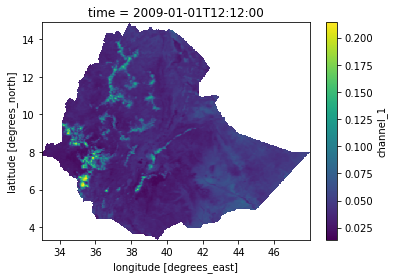

In [3]:
xr_df['channel_1'].plot()

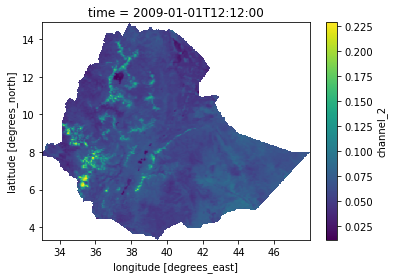

In [4]:
xr_df['channel_2'].plot()

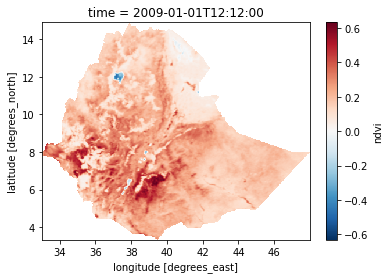

In [5]:
xr_df['ndvi'].plot()

### Cloudmask dataset

In [4]:
import xarray as xr
import os
base_dir = r'D:\MSG\cloudmask\processed_clouds'
file = 'MSGCLMK_20100115T121500Z_20100115T121500Z_epct_82eea5af_P.nc'
xr_df = xr.open_dataset(os.path.join(base_dir, file))
xr_df

<xarray.Dataset>
Dimensions:     (lat: 356, lon: 461)
Coordinates:
  * lat         (lat) float64 3.338 3.371 3.403 3.436 ... 14.82 14.85 14.88
  * lon         (lon) float64 33.02 33.05 33.08 33.11 ... 47.87 47.9 47.94 47.97
Data variables:
    crs         |S1 ...
    cloud_mask  (lat, lon) float32 ...
Attributes: (12/29)
    Conventions:               CF-1.5
    EPCT_geospatial_lat_max:   81.2597442
    EPCT_geospatial_lat_min:   -81.2596919
    EPCT_geospatial_lon_max:   81.2597442
    EPCT_geospatial_lon_min:   -81.2596919
    EPCT_orbit:                N/A
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    2.15.0
    EPCT_software_name:        EPCT
    EPCT_stretch_method:       null

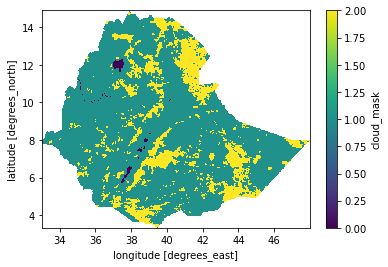

In [10]:
xr_df['cloud_mask'].plot()

In [76]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt

def downsample(ds):
    monthly = ds.resample(time='5D', skipna=True).mean()
    return monthly

def clean_ndvi(ds):
    ds = ds.where('ndvi'!=0.00)
    return ds

base_dir = r'D:\MSG\msg_data\netcdf_data\processed'
ds = xr.open_mfdataset(os.path.join(base_dir,'*.nc'))
clouds_dir = r'D:\MSG\cloudmask\processed_clouds'
ds_cl = xr.open_mfdataset(os.path.join(clouds_dir,'time','*.nc'))

In [77]:
### normalize time in order for the two datasets to match
ds_cl['time'] = ds_cl.indexes['time'].normalize()
ds['time'] = ds.indexes['time'].normalize()

### apply time mask
ds = ds.where(ds.time == ds_cl.time)

### apply mask and downsample to 5 days
res_xr = ds.where(ds_cl.cloud_mask<2)
res_xr_p = downsample(res_xr)

### mask all the values equal to 0 (clouds)
mask_clouds = clean_ndvi(ds)
mask_clouds_p = downsample(mask_clouds)

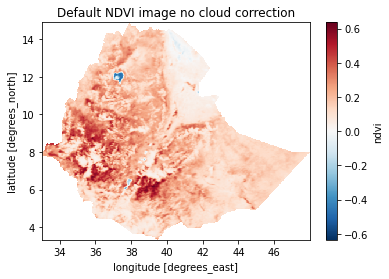

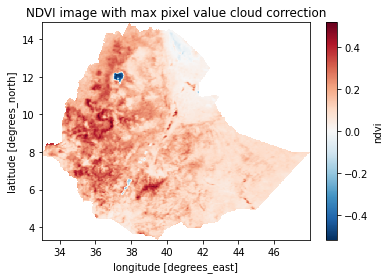

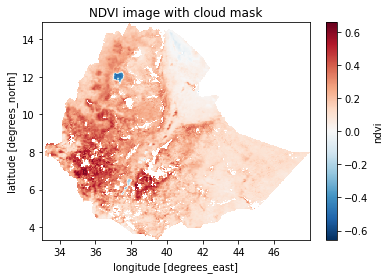

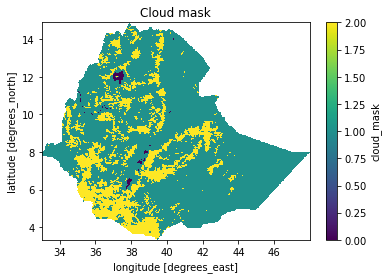

In [78]:
time = '2009-12-05'
#print('')
ds['ndvi'].sel(time=time, method = 'nearest').plot()
plt.title('Default NDVI image no cloud correction')
plt.show()
mask_clouds_p['ndvi'].sel(time=time,  method = 'nearest').plot()
plt.title('NDVI image with max pixel value cloud correction')
plt.show()
res_xr_p['ndvi'].sel(time=time,  method = 'nearest').plot()
plt.title('NDVI image with cloud mask')
plt.show()
ds_cl['cloud_mask'].sel(time=time,  method = 'nearest').plot()
plt.title('Cloud mask')
plt.show()

### Difference in absolute value

In [79]:
res = mask_clouds_p['ndvi'].isel(time=0) - res_xr_p['ndvi'].isel(time=0)

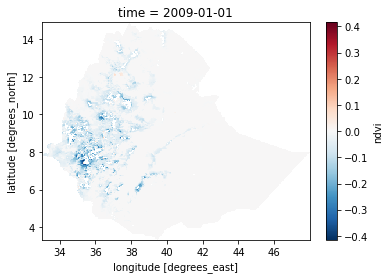

In [80]:
res.plot()

In [89]:
mask_clouds['ndvi'].sum(res_xr['ndvi'])

KeyboardInterrupt: 

In [87]:
diff = mask_clouds['ndvi'] res_xr['ndvi']
diff_p = mask_clouds_p['ndvi'] - res_xr_p['ndvi']

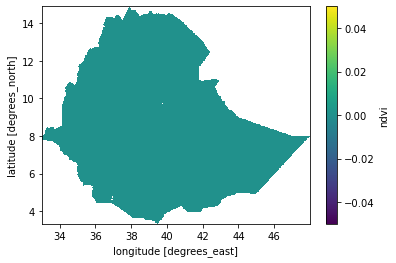

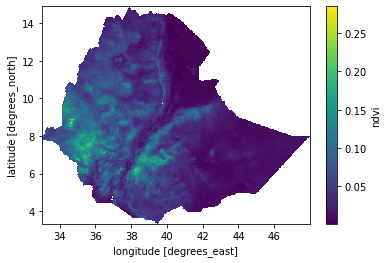

In [88]:
abs(diff).mean('time', skipna=True).plot()
plt.show()

abs(diff_p).mean('time').plot()
plt.show()

### Check correlation

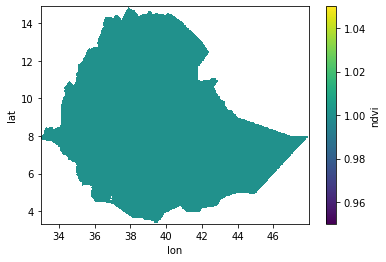

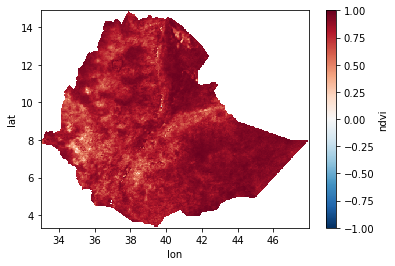

In [46]:
import xskillscore as xs

# Selecting variables from the dataarray...................................
ndvi_= res_xr['ndvi'].chunk(dict(time=-1))
mask_= mask_clouds['ndvi'].chunk(dict(time=-1))

xs.pearson_r(ndvi_, mask_, dim='time', skipna=True).plot()
plt.show()

# Selecting variables from the dataarray...................................
ndvi_= res_xr_p['ndvi'].chunk(dict(time=-1))
mask_= mask_clouds_p['ndvi'].chunk(dict(time=-1))

xs.pearson_r(ndvi_, mask_, dim='time', skipna=True).plot()
plt.show()

### Calculate NDVI indices

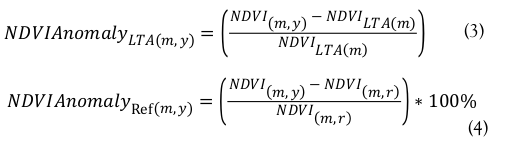

In [44]:
from IPython.display import Image
Image(r"C:\Users\Riccardo\Desktop\PhD docs\Drought prediction\formula_anomaly NDVI.PNG")


In [12]:
###nomral anomaly
def lta_anomaly(ds):
    climatology = ds.groupby("time.month").mean("time")  ###12 months only, average per month
    anomalies =ds.groupby("time.month") - climatology  ### group data by month and subtract the average value
    anomalies = anomalies.drop('month')
    ds = ds.assign(ndvi_lta = anomalies['ndvi'])
    return ds

### reference anomaly with max month
def ref_anomaly(ds):
    climatology = ds.groupby("time.month").max('time').drop('crs') ###12 months only, average per month
    anomalies = ds.groupby("time.month") - climatology ### group data by month and subtract the average value
    #anomalies = anomalies.drop('month')
    ds = ds.assign(ndvi_ref = anomalies['ndvi'])
    return ds

### anomaly using daily data

def daily_anomaly(ds):
    monthly = ds.resample(time='1MS').mean()  ###resample by average value per month
    upsampled_monthly = monthly.resample(time='1D').ffill()  ### upsample filling constant values per month
    anomalies = monthly - upsampled_monthly  ### calculating the anomaly
    return anomalies

In [13]:
#### Implementation of the formula

def lta_anomaly_(ds):
    monthly = ds['ndvi'].resample(time='1MS').mean('time')
    month_12 = ds.groupby("time.month").mean("time")
    daily = monthly.resample(time='1D').ffill()
    monthly_res = daily.resample(time='1MS').first(skipna=False)
    return (monthly - monthly_res)/ monthly_res

def ref_anomaly_(ds):
    monthly = ds['ndvi'].resample(time='1MS').mean('time')
    daily = monthly.resample(time='1D').ffill()
    monthly_res = daily.resample(time='1MS').first(skipna=False)
    return (monthly - monthly_res)/ monthly_res

In [48]:
ds_an = lta_anomaly(res_xr)
ds_d_an = daily_anomaly(res_xr)
ds_an_ref = ref_anomaly(res_xr)

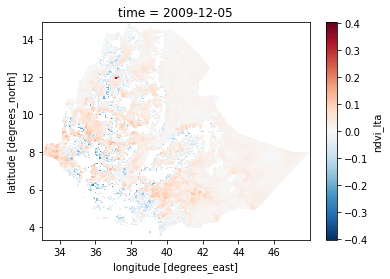

C:\Users\Riccardo\anaconda3\envs\gis_py39\lib\site-packages\dask\array\reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


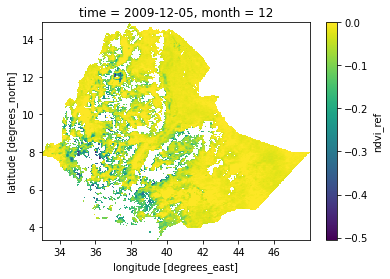

In [59]:
ds_an.sel(time=time, method = 'nearest')['ndvi_lta'].plot()
plt.show()

ds_an_ref.sel(time=time, method = 'nearest')['ndvi_ref'].plot()
plt.show()



C:\Users\Riccardo\anaconda3\envs\gis_py39\lib\site-packages\dask\array\reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


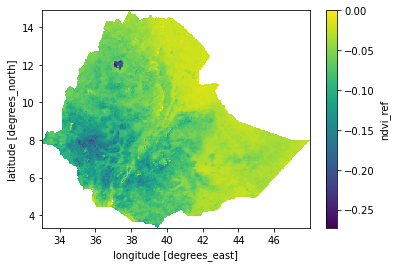

In [62]:
ds_an_ref.mean('time')['ndvi_ref'].plot()

### Formulas

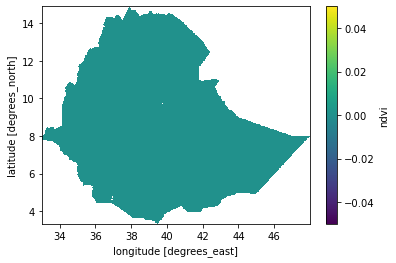

In [68]:
ds_lta = lta_anomaly_(res_xr)
ds_lta.mean('time').plot()

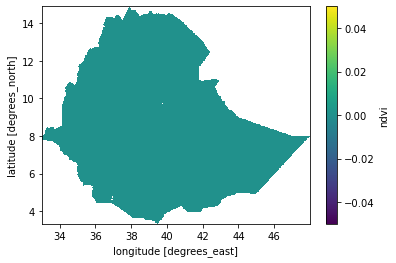

In [69]:
ds_ref = ref_anomaly_(res_xr)
ds_ref.mean('time').plot()

### Importing requested cloud mask data

In [44]:
import re
import os
path = r'D:\MSG\msg_data\clouds data\extracted'
reg = r'(CFCin2009)(\d{4})1215(.*)'

r = re.compile(reg)
for root, dirs, files in os.walk(path):
    l = [os.path.join(root,x) for x in files if r.match(x)]
    
new_list = [i.rsplit('\\')[-1]for i in l]

#List all files in path
for filename in os.listdir(path):
  
    #If file is not present in list
    if filename not in new_list:
        #Get full path of file and remove it
        os.remove(os.path.join(path, filename))

In [73]:
xr_cl = xr.open_dataset(l[0])

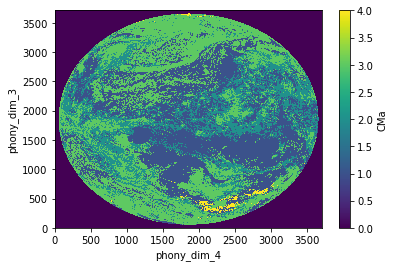

In [76]:
xr_cl['CMa'].plot()

### Open MSG files with Satpy

In [19]:
from satpy import DataQuery
from satpy import Scene
import xarray as xr
from satpy.dataset import combine_metadata
import matplotlib.pyplot as plt
from glob import glob

my_channel_id = DataQuery(name=['VIS006'], calibration='reflectance')
my_channel_id_2 = DataQuery(name=['VIS008'], calibration='reflectance')

scn.load([my_channel_id, my_channel_id_2])

In [20]:
lon, lat = scn[0.8].attrs['area'].get_lonlats()

In [22]:
ndvi = (scn[0.8] - scn[0.6]) / (scn[0.8] + scn[0.6])
ndvi.attrs = combine_metadata(scn[0.8], scn[0.6])
scn['ndvi'] = ndvi
#scn.show('ndvi')

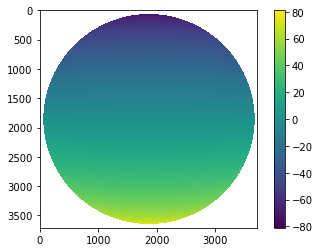

In [23]:
plt.imshow(lat.astype('float32'))
plt.colorbar()
plt.show()

In [19]:
local_scn = scn.resample("africa")

In [20]:
print(local_scn)
local_scn.show('ndvi')

C:\Users\Riccardo\anaconda3\envs\gis_py39\lib\site-packages\pyproj\crs\crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<xarray.DataArray 'my_index-58c47e0332f346184dbb09b984492b40' (y: 9276, x: 8350)>
dask.array<my_index, shape=(9276, 8350), dtype=float32, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 4.48e+06 4.479e+06 4.478e+06 ... -4.794e+06 -4.795e+06
  * x        (x) float64 -4.458e+06 -4.457e+06 -4.456e+06 ... 3.89e+06 3.891e+06
Attributes:
    orbital_parameters:                     {'projection_longitude': 0.0, 'pr...
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   0.9666673691410287
    units:                                  %
    wavelength:                             0.635 µm (0.56-0.71 µm)
    standard_name:                          toa_bidirectional_reflectance
    platform_name:                          Meteosat-9
    sensor:                                 seviri
    georef_offset_corrected:                False
    start

C:\Users\Riccardo\anaconda3\envs\gis_py39\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\Riccardo\anaconda3\envs\gis_py39\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\Riccardo\anaconda3\envs\gis_py39\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
